## A Logistic regression implementation to classifiy a cat or dog

This implementation uses **cross entropy loss function** to minimise the loss.

The data loading steps are in there in the file ``lr_utils_new.py```

In [1]:
#importing necessary modules
import numpy as np
import matplotlib.pyplot as plt
import h5py
import scipy
from PIL import Image
from scipy import ndimage
from lr_utils_new import load_dataset
%matplotlib inline

C:\Users\I351539\AppData\Local\Continuum\anaconda3\lib\site-packages\h5py\__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters


In [2]:
# Loading the data (cat/non-cat)
train_set_x_orig, train_set_y, test_set_x_orig, test_set_y = load_dataset()

y = [0]


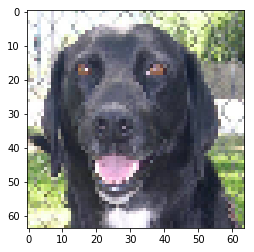

In [4]:
# Visualizing an image from data
index = 13
plt.imshow(train_set_x_orig[index])
print ("y = " + str(train_set_y[:,index]))

In [5]:
m_train = train_set_y.shape[1]
m_test = test_set_y.shape[1]
num_px = train_set_x_orig.shape[1]

# Reshaping the training and test examples
train_set_x_flatten = train_set_x_orig.reshape(train_set_x_orig.shape[0], -1).T
test_set_x_flatten = test_set_x_orig.reshape(test_set_x_orig.shape[0], -1).T

print ("train_set_x_flatten shape: " + str(train_set_x_flatten.shape))
print ("train_set_y shape: " + str(train_set_y.shape))
print ("test_set_x_flatten shape: " + str(test_set_x_flatten.shape))
print ("test_set_y shape: " + str(test_set_y.shape))


train_set_x_flatten shape: (12288, 247)
train_set_y shape: (1, 247)
test_set_x_flatten shape: (12288, 62)
test_set_y shape: (1, 62)


In [6]:
# Standardise our dataset
train_set_x = train_set_x_flatten / 256.
test_set_x = test_set_x_flatten / 256.


In [7]:
# Define the sigmoid function
def sigmoid(z):
    s = 1 / (1 + np.exp(-1*z))   
    return s

In [8]:
# initialize_with_zeros

def initialize_with_zeros(dim):
    w = np.zeros(shape=(dim, 1))
    b = 0
    return w, b

In [10]:
# Forward and backward propogation

def propagate(w, b, X, Y):
    m = X.shape[1]
    A = sigmoid(np.dot(w.T, X) + b)  # compute activation
    cost = (- 1 / (m)) * np.sum((Y * np.log(A)) + ((1 - Y) * (np.log(1 - A))))  # compute cost
    
    dw = (1 / m) * np.dot(X, (A - Y).T)
    db = (1 / m) * np.sum(A - Y)

    grads = {"dw": dw,
             "db": db}
    
    return grads, cost


In [11]:
# ptimize

def optimize(w, b, X, Y, num_iterations, learning_rate, print_cost = False):
    costs = []
    
    for i in range(num_iterations):

        # Cost and gradient calculation (≈ 1-4 lines of code)
        grads, cost = propagate(w, b, X, Y)
        
        # Retrieve derivatives from grads
        dw = grads["dw"]
        db = grads["db"]
        
        w = w - learning_rate * dw  # need to broadcast
        b = b - learning_rate * db
        
        # Record the costs
        if i % 100 == 0:
            costs.append(cost)
        
        # Print the cost every 100 training examples
        if print_cost and i % 100 == 0:
            print ("Cost after iteration %i: %f" % (i, cost))
    
    params = {"w": w,
              "b": b}
    
    grads = {"dw": dw,
             "db": db}
    
    return params, grads, costs


In [12]:
# predict
def predict(w, b, X):

    m = X.shape[1]
    Y_prediction = np.zeros((1, m))
    w = w.reshape(X.shape[0], 1)
    
    A = sigmoid(np.dot(w.T, X) + b)
    
    for i in range(A.shape[1]):
        # Convert probabilities a[0,i] to actual predictions p[0,i]
        Y_prediction[0, i] = 1 if A[0, i] > 0.5 else 0
    
    assert(Y_prediction.shape == (1, m))
    return Y_prediction


In [13]:
# Main model

def model(X_train, Y_train, X_test, Y_test, num_iterations=2000, learning_rate=0.0005, print_cost=False):

    # initialize parameters with zeros (≈ 1 line of code)
    w, b = initialize_with_zeros(X_train.shape[0])

    # Gradient descent
    parameters, grads, costs = optimize(w, b, X_train, Y_train, num_iterations, learning_rate, print_cost)
    
    w = parameters["w"]
    b = parameters["b"]
    
    # Predict test/train set examples 
    Y_prediction_test = predict(w, b, X_test)
    Y_prediction_train = predict(w, b, X_train)

    # Print train/test Errors
    print("train accuracy: {} %".format(100 - np.mean(np.abs(Y_prediction_train - Y_train)) * 100))
    print("test accuracy: {} %".format(100 - np.mean(np.abs(Y_prediction_test - Y_test)) * 100))

    d = {"costs": costs,
         "Y_prediction_test": Y_prediction_test, 
         "Y_prediction_train" : Y_prediction_train, 
         "w" : w, 
         "b" : b,
         "learning_rate" : learning_rate,
         "num_iterations": num_iterations}
    
    return d

In [14]:
# Calling our main model
d = model(train_set_x, train_set_y, test_set_x, test_set_y, num_iterations = 1000, learning_rate = 0.0005, print_cost = True)

Cost after iteration 0: 0.693147
Cost after iteration 100: 0.657610
Cost after iteration 200: 0.634201
Cost after iteration 300: 0.614456
Cost after iteration 400: 0.596875
Cost after iteration 500: 0.580884
Cost after iteration 600: 0.566184
Cost after iteration 700: 0.552577
Cost after iteration 800: 0.539913
Cost after iteration 900: 0.528073
train accuracy: 83.40080971659918 %
test accuracy: 50.0 %


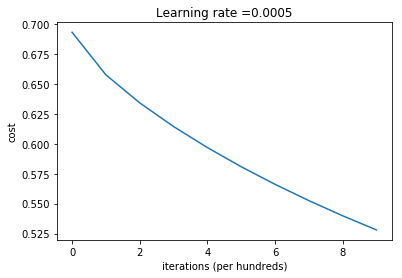

In [15]:
# Plot learning curve (with costs)
costs = np.squeeze(d['costs'])
plt.plot(costs)
plt.ylabel('cost')
plt.xlabel('iterations (per hundreds)')
plt.title("Learning rate =" + str(d["learning_rate"]))
plt.show()

learning rate is: 0.001
train accuracy: 91.90283400809716 %
test accuracy: 48.38709677419355 %

-------------------------------------------------------

learning rate is: 0.0001
train accuracy: 74.49392712550608 %
test accuracy: 48.38709677419355 %

-------------------------------------------------------

learning rate is: 1e-05
train accuracy: 55.06072874493927 %
test accuracy: 40.32258064516129 %

-------------------------------------------------------



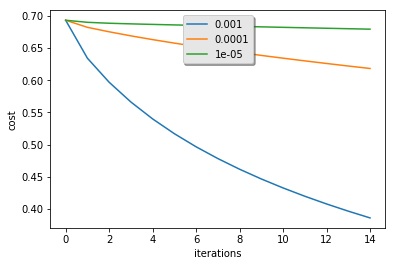

In [16]:
# Analysis of system on multiple learning rates
learning_rates = [0.001, 0.0001, 0.00001]
models = {}
for i in learning_rates:
    print ("learning rate is: " + str(i))
    models[str(i)] = model(train_set_x, train_set_y, test_set_x, test_set_y, num_iterations = 1500, learning_rate = i, print_cost = False)
    print ('\n' + "-------------------------------------------------------" + '\n')

for i in learning_rates:
    plt.plot(np.squeeze(models[str(i)]["costs"]), label= str(models[str(i)]["learning_rate"]))

plt.ylabel('cost')
plt.xlabel('iterations')

legend = plt.legend(loc='upper center', shadow=True)
frame = legend.get_frame()
frame.set_facecolor('0.90')
plt.show()